1.
For this regression task of predicting the number of sick people based on historical data, I chose a simple feedforward neural nerwork. I made this decision based on the narure of the problem, which involves predicting a numerical value. A feedforward architecture is suitable for capturing complex patterns in the input features, and the choice of a regression model aligns with the goal of estmating a numerical values.

In [17]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from google.colab import files
import io

#Uploading the dataset
uploaded = files.upload()
file_name = next(iter(uploaded))

#Loading the dataset as a CSV
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

#Displaying the first few rows of the dataset
df.head()

Saving exam_data.csv to exam_data (10).csv


,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,1/22/2020,0,0,0,0,0,0,0
1,1/23/2020,0,0,0,0,0,0,0
2,1/24/2020,0,0,0,0,0,0,0
3,1/25/2020,0,0,0,0,0,0,0
4,1/26/2020,0,0,0,0,0,0,0


2.
Data Preprocessing:
-uploaded the dataset
-standardized the input features

Neural Network Architecture:
-designed a sequential neural network with three hidden layers and a linear output layer for regression
-selected activation functions (ReLU for hidden layers) and linear activation for the output layer
-configured the model with mean squared error loss and the Adam optimizer

Training and Evaluation:
-split the dataset into training and testing sets
-trained the neural network over 100 epochs with a batch size of 32.
-evaluated the model's performance on the test set using standard regression metrics, including Mean Squared Error, Mean Absolute Error, Root Mean Squared Error, and R-squared.

Epoch 1/100
5/5 - 1s - loss: 102366160.0000 - val_loss: 90471280.0000 - 1s/epoch - 246ms/step
Epoch 2/100
5/5 - 0s - loss: 102360416.0000 - val_loss: 90466544.0000 - 61ms/epoch - 12ms/step
Epoch 3/100
5/5 - 0s - loss: 102355848.0000 - val_loss: 90462272.0000 - 59ms/epoch - 12ms/step
Epoch 4/100
5/5 - 0s - loss: 102351336.0000 - val_loss: 90458056.0000 - 78ms/epoch - 16ms/step
Epoch 5/100
5/5 - 0s - loss: 102346536.0000 - val_loss: 90453744.0000 - 69ms/epoch - 14ms/step
Epoch 6/100
5/5 - 0s - loss: 102341712.0000 - val_loss: 90448656.0000 - 82ms/epoch - 16ms/step
Epoch 7/100
5/5 - 0s - loss: 102336448.0000 - val_loss: 90442744.0000 - 61ms/epoch - 12ms/step
Epoch 8/100
5/5 - 0s - loss: 102330152.0000 - val_loss: 90436064.0000 - 64ms/epoch - 13ms/step
Epoch 9/100
5/5 - 0s - loss: 102323040.0000 - val_loss: 90428256.0000 - 76ms/epoch - 15ms/step
Epoch 10/100
5/5 - 0s - loss: 102314360.0000 - val_loss: 90419432.0000 - 78ms/epoch - 16ms/step
Epoch 11/100
5/5 - 0s - loss: 102304016.0000 - val

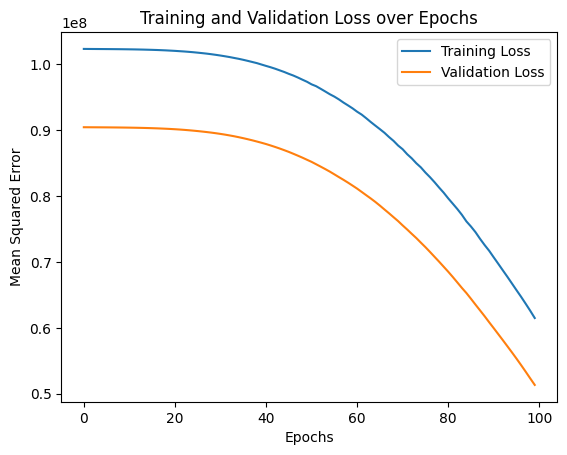

In [18]:
#Selecting features and target
X = df.iloc[:, 1:-1].values  # Excluding Date and Active
y = df['Active'].values

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Building the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

#Evaluating the model on the test set
y_pred = model.predict(X_test)

#Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#Printing performance metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2): {r2}")

#Ploting training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()

3.With more time, I would have done hyperparameter tuning to optimize the model's performance. I would have also tried grid search or random search to find the best combination of learning rates, batch sizes, and layer sizes.